In [337]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [338]:
def decorate_plot(ax, x_ticks, xname, yname, loc=(-0.025, -0.3)):
    SIZE_TICKS = 10

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # axis names
    ax.set_xlabel(xname, fontsize=15)
    ax.xaxis.set_label_coords(0.98, 0.05)

    ax.set_ylabel(yname, rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(0.025, 0.95)

    ax.set_xticks(x_ticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

    # Adjust layout
    plt.tight_layout()

In [339]:
# data_ = np.array([
#     -10.038, -5.731, -3.571, -4.769, -2.148, -5.876, -2.890, -5.026, -6.664, -6.096,
#     0.547, -6.359, -8.738, -3.841, -3.484, -5.938, -4.247, -7.160, -2.433, -3.900,
#     -1.690, -0.590, -3.802, -4.190, -1.819, -2.458, 1.452, -3.434, -5.249, -2.010,
#     -4.633, -3.080, -8.746, -5.190, -3.556, -2.031, -4.076, -2.690, -4.211, -2.686,
#     -3.498, -2.744, -3.635, -6.060, -4.377, -3.914, -2.641, -5.916, -4.041, -2.953,
#     -6.094, -6.146, -2.992, -4.370, -0.334, -6.045, -2.156, -5.746, -2.191, -6.026,
#     -2.762, -5.168, -3.052, -2.823, -6.320, -2.055, -3.915, -4.372, -0.723, -3.751,
#     -4.142, -1.953, -4.221, 0.238, -2.718, -5.712, -2.016, -3.995, -7.838, -3.634,
#     -3.843, -1.986, -3.188, -1.993, -6.454, -4.969, -5.130, -6.158, -2.055, -3.492,
#     -5.332, -9.888, -2.272, -5.609, -3.733, -6.413, -2.637, -3.782, -4.319, -2.973,
#     -4.319, -3.607, -3.343, -3.979, -2.975, -5.756, -5.843, -4.214, -6.592, -6.628,
#     -1.026, -1.497, -5.495, -4.451, -3.347, -4.243, -3.505, -1.886, -3.364, -3.669
# ])

data_ = np.array([
    -3.442, 1.295, 3.672, 2.354, 5.238, 1.136, 4.421, 2.071, 0.269, 0.894,
    8.202, 0.605, -2.011, 3.375, 3.767, 1.068, 2.928, -0.276, 4.924, 3.31,
    5.741, 6.951, 3.417, 2.991, 5.599, 4.896, 9.197, 3.823, 1.827, 5.389,
    2.504, 4.212, -2.021, 1.891, 3.689, 5.366, 3.117, 4.641, 2.968, 4.645,
    3.752, 4.582, 3.601, 0.934, 2.785, 3.294, 4.695, 1.092, 3.155, 4.352,
    0.896, 0.839, 4.309, 2.793, 7.233, 0.95, 5.228, 1.28, 5.19, 0.972,
    4.562, 1.915, 4.243, 4.495, 0.648, 5.34, 3.294, 2.791, 6.805, 3.474,
    3.044, 5.452, 2.957, 7.862, 4.61, 1.317, 5.383, 3.205, -1.022, 3.602,
    3.373, 5.415, 4.093, 5.407, 0.501, 2.135, 1.957, 0.826, 5.34, 3.759,
    1.735, -3.277, 5.101, 1.43, 3.494, 0.545, 4.699, 3.44, 2.85, 4.33
])

data_

array([-3.442,  1.295,  3.672,  2.354,  5.238,  1.136,  4.421,  2.071,
        0.269,  0.894,  8.202,  0.605, -2.011,  3.375,  3.767,  1.068,
        2.928, -0.276,  4.924,  3.31 ,  5.741,  6.951,  3.417,  2.991,
        5.599,  4.896,  9.197,  3.823,  1.827,  5.389,  2.504,  4.212,
       -2.021,  1.891,  3.689,  5.366,  3.117,  4.641,  2.968,  4.645,
        3.752,  4.582,  3.601,  0.934,  2.785,  3.294,  4.695,  1.092,
        3.155,  4.352,  0.896,  0.839,  4.309,  2.793,  7.233,  0.95 ,
        5.228,  1.28 ,  5.19 ,  0.972,  4.562,  1.915,  4.243,  4.495,
        0.648,  5.34 ,  3.294,  2.791,  6.805,  3.474,  3.044,  5.452,
        2.957,  7.862,  4.61 ,  1.317,  5.383,  3.205, -1.022,  3.602,
        3.373,  5.415,  4.093,  5.407,  0.501,  2.135,  1.957,  0.826,
        5.34 ,  3.759,  1.735, -3.277,  5.101,  1.43 ,  3.494,  0.545,
        4.699,  3.44 ,  2.85 ,  4.33 ])

In [340]:
def group(data):
    n_ = len(data)
    print(f'n: {n_}')

    min_ = min(data)
    max_ = max(data)
    print(f'min: {min_}     max: {max_}')

    range_ = max_ - min_
    print(f'range: {range_}')

    l_ = 1 + int(np.log2(n_))
    print(f'l: {l_}')

    h_ = range_ / l_
    print(f'h: {h_}')

    int_boundaries_ = np.array(
        [min_ + i * h_ for i in range(0, l_ + 1, 1)]
    )
    print(f'interval boundaries: {int_boundaries_}')
    intervals_ = np.array(
        [(int_boundaries_[i], int_boundaries_[i+1]) for i in range(0, l_, 1)]
    )
    print(f'intervals: {intervals_}')
    mid_ranges_ = np.array(
        [sum(interval)/2 for interval in intervals_]
    )
    print(f'intervals\' midpoints: {mid_ranges_}')

    present = lambda el, int_ : int_[0] <= el < int_[1]
    freqs_ = np.zeros(l_)
    for el in data:
        for j in range(0, l_, 1):
            if present(el, intervals_[j]):
                freqs_[j] += 1 

    freqs_[-1] += np.count_nonzero(data == max_)
    print(f'frequencies: {freqs_}')


    rel_freqs_ = freqs_ / n_
    print(f'relative frequencies: {rel_freqs_}')

    assert np.sum(rel_freqs_) == 1

    rel_freqs_density_ = rel_freqs_ / h_
    print(f'relative frequencies\' density: {rel_freqs_density_}')

    print(f'-'*100)

    space_ = ' ' * 5
    for i in range(l_):
        print(f'{intervals_[i]}{space_}{freqs_[i]}{space_}{rel_freqs_[i]}{space_}{rel_freqs_density_[i]}')
    
    return n_, min_, max_, h_, int_boundaries_, mid_ranges_, rel_freqs_density_

n_, min_, max_, h_, int_boundaries_, mid_ranges_, rel_freqs_density_ = group(data_)

n: 100
min: -3.442     max: 9.197
range: 12.639
l: 7
h: 1.8055714285714284
interval boundaries: [-3.442      -1.63642857  0.16914286  1.97471429  3.78028571  5.58585714
  7.39142857  9.197     ]
intervals: [[-3.442      -1.63642857]
 [-1.63642857  0.16914286]
 [ 0.16914286  1.97471429]
 [ 1.97471429  3.78028571]
 [ 3.78028571  5.58585714]
 [ 5.58585714  7.39142857]
 [ 7.39142857  9.197     ]]
intervals' midpoints: [-2.53921429 -0.73364286  1.07192857  2.8775      4.68307143  6.48864286
  8.29421429]
frequencies: [ 4.  2. 24. 32. 30.  5.  3.]
relative frequencies: [0.04 0.02 0.24 0.32 0.3  0.05 0.03]
relative frequencies' density: [0.02215365 0.01107683 0.13292191 0.17722921 0.16615239 0.02769206
 0.01661524]
----------------------------------------------------------------------------------------------------
[-3.442      -1.63642857]     4.0     0.04     0.02215365139647124
[-1.63642857  0.16914286]     2.0     0.02     0.01107682569823562
[0.16914286 1.97471429]     24.0     0.24     0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


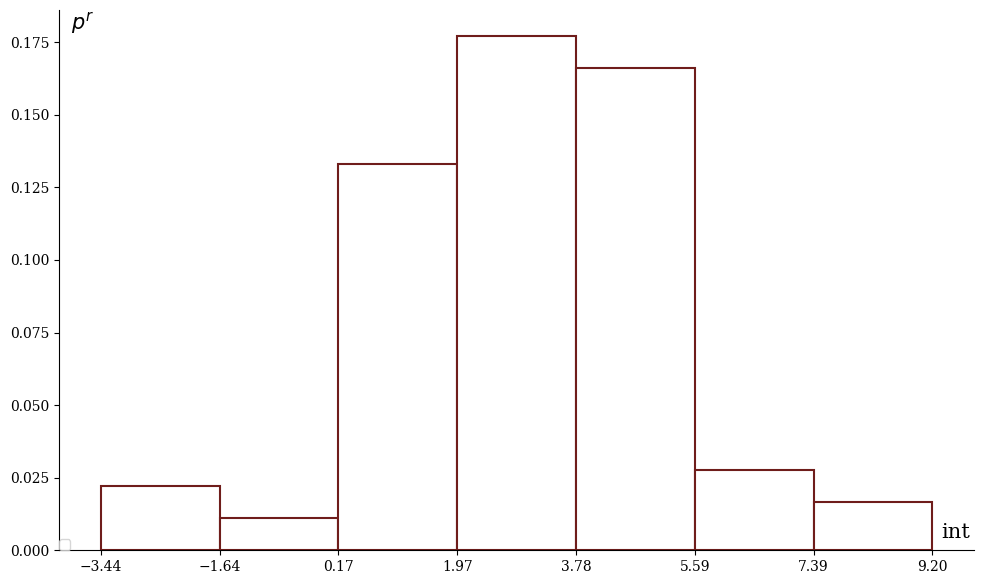

In [341]:
def buildBar(filename):
    RED = '#6F1D1B'

    _, ax = plt.subplots(figsize=(10, 6))

    x_values = mid_ranges_
    y_values = rel_freqs_density_

    ax.bar(x_values, 
           y_values, 
           width=h_, 
           color='white',
           edgecolor=RED, 
           linestyle='-', 
           linewidth=1.5, 
           align='center')
    
    decorate_plot(ax, int_boundaries_, 'int', '$p^r$', loc=(0, 0))

    plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    plt.show()

buildBar('hist')

In [342]:
overlineX = 1/n_ * sum(data_)
print(f'mean: {overlineX}')

S2 = 1/(n_ - 1) * sum((data_ - overlineX)**2)
print(f'variance: {S2}')

mean: 3.1770500000000013
variance: 5.143177522727274


In [343]:
# alpha = 0.05
# a0 = -3.5
# sigma0 = 2
# a1 = -4
# sigma1 = 2
# epsilon = 0.1

alpha = 0.1
a0 = 3
sigma0 = 2.1
a1 = 3.5
sigma1 = 2.2
epsilon = 0.1

check = lambda cond : 'accept' if not cond else 'decline'

In [344]:
quantile = sp.stats.t.ppf(1-alpha, n_-1)

C2 = np.sqrt(S2)*quantile/np.sqrt(n_) + a0
print(f'C2 = {C2}, overlineX > C2 = {overlineX > C2} => {check(overlineX > C2)}')

C2 = 3.2925902269068135, overlineX > C2 = False => accept


In [345]:
quantile = sp.stats.chi2.ppf(1-alpha, n_-1)

C3 = quantile * sigma0**2 / (n_ - 1)
print(f'C3 = {C3}, S2 > C3 = {S2 > C3} => {check(S2 > C3)}')

C3 = 5.229942978320151, S2 > C3 = False => accept


In [346]:
quantile = sp.stats.norm.ppf(alpha, 0, 1)

C1 = quantile * sigma1 / np.sqrt(n_) + a0
print(f'C1 = {C1}, overlineX < C1 = {overlineX < C1} => {check(overlineX < C1)}')

C1 = 2.718058655580188, overlineX < C1 = False => accept


In [347]:
val = (C1 - a1)/sigma1 * np.sqrt(n_)

beta = 1 - sp.stats.norm.cdf(val, 0, 1)
print(f'beta = {beta}')

beta = 0.9998104914314868


In [348]:
quantile = sp.stats.norm.ppf(1 - epsilon, 0, 1)

a1_ = -quantile * sigma1 / np.sqrt(n_) + C1
print(f'a1\' = {a1_}')

a1' = 2.436117311160376


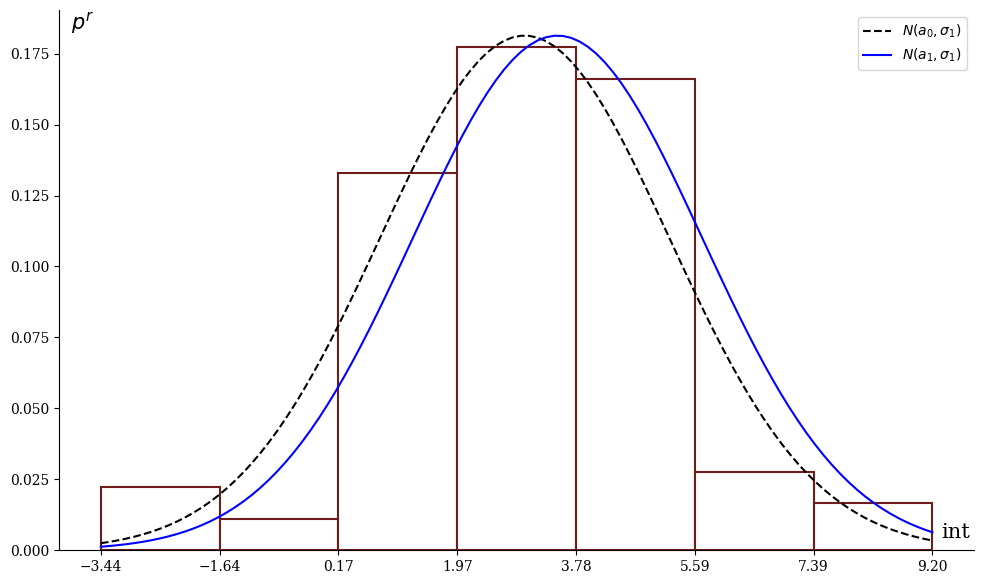

In [ ]:
def buildBar(filename):
    RED = '#6F1D1B'

    _, ax = plt.subplots(figsize=(10, 6))

    x_values = mid_ranges_
    y_values = rel_freqs_density_

    # hist
    ax.bar(x_values, 
           y_values, 
           width=h_, 
           color='white', 
           edgecolor=RED, 
           linestyle='-', 
           linewidth=1.5, 
           align='center')
    
    x_values = np.linspace(min_, max_, 100)

    # norm pdf with a0 sigma1
    y_values = sp.stats.norm.pdf(x_values, a0, sigma1)
    ax.plot(x_values, 
            y_values, 
            color='black', 
            linestyle='--', 
            linewidth=1.5, 
            label='$N(a_0, \\sigma_1)$')

    # norm pdf with a1 sigma1
    y_values = sp.stats.norm.pdf(x_values, a1, sigma1)
    ax.plot(x_values, 
            y_values, 
            color='blue', 
            linestyle='-', 
            linewidth=1.5, 
            label='$N(a_1, \\sigma_1)$')

    decorate_plot(ax, int_boundaries_, 'int', '$p^r$', loc='best')

    plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    plt.show()

buildBar('hist_pdf1_pdf2')